# PANDAS DATA WRANGLING PRACTICE.
# Global Renewable energy production.
# https://www.kaggle.com/datasets/ahmedgaitani/global-renewable-energy
# This dataset contains annual data on renewable energy production from various countries, spanning from 2000 to 2023. It includes information on energy generation from solar, wind, hydro, and other renewable sources(e.g., geothermal, biomass). The dataset aims to provide insights into the growth and distribution of renewable energy production worldwide.

# Insights to derive from the wrangling

1. Identify which countries produce the most renewable energy overall and by specific types (e.g., solar, wind, hydro).
2. Analyze how renewable energy production has evolved over time for different countries and types.(e.g over the duration inthe dataset)
3. Compare renewable energy production across regions or economic groups (e.g., developed vs. developing countries).
4. Determine the growth rates of renewable energy production in various countries to highlight rapid adopters.
5. Evaluate the proportion of different types of renewable energy (solar, wind, hydro, etc.) in each country's energy mix.
6. Assess the impact of policy changes or investments on renewable energy production.(create correlation to query)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings #for issuing and controlling warning messages
warnings.filterwarnings("ignore") # configures the warnings system to ignore all warning messages.
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

In [2]:
# loading the dataset
renewable_df = pd.read_csv('global_renewable_energy_production.csv')

In [3]:
renewable_df.head()

,Year,Country,SolarEnergy,WindEnergy,HydroEnergy,OtherRenewableEnergy,TotalRenewableEnergy
0,2000,USA,437.086107,1435.928598,1544.389701,319.396318,3736.800724
1,2001,USA,240.416776,402.792876,398.742141,439.779266,1481.731059
2,2002,USA,641.003511,1120.494351,334.993640,486.459433,2582.950935
3,2003,USA,849.198377,476.040844,609.102444,132.532029,2066.873694
4,2004,USA,373.818019,882.183361,1034.306532,181.053113,2471.361025


In [4]:
renewable_df.tail()

,Year,Country,SolarEnergy,WindEnergy,HydroEnergy,OtherRenewableEnergy,TotalRenewableEnergy
235,2019,Japan,346.649699,920.431403,1407.414660,423.383812,3097.879574
236,2020,Japan,285.779145,214.294577,532.705571,455.008389,1487.787682
237,2021,Japan,886.501070,976.637033,1320.878663,349.266504,3533.283269
238,2022,Japan,257.834151,1388.735530,1011.909892,222.412338,2880.891910
239,2023,Japan,567.025935,261.055757,582.681727,382.115127,1792.878546


In [5]:
renewable_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  240 non-null    int64  
 1   Country               240 non-null    object 
 2   SolarEnergy           240 non-null    float64
 3   WindEnergy            240 non-null    float64
 4   HydroEnergy           240 non-null    float64
 5   OtherRenewableEnergy  240 non-null    float64
 6   TotalRenewableEnergy  240 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.3+ KB


In [6]:
renewable_df.shape

(240, 7)

In [7]:
renewable_df.describe()

,Year,SolarEnergy,WindEnergy,HydroEnergy,OtherRenewableEnergy,TotalRenewableEnergy
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2011.500000,528.523858,857.133260,1076.581975,287.127554,2749.366647
std,6.936653,271.183089,375.020314,499.981598,128.460792,695.126957
min,2000.000000,104.555425,206.021630,320.662607,54.876943,910.381025
25%,2005.750000,284.700505,523.572495,593.796081,176.322725,2250.759951
50%,2011.500000,533.436429,882.024084,1046.390380,291.398276,2815.458943
75%,2017.250000,766.701662,1160.199295,1495.160715,405.479393,3217.212712
max,2023.000000,996.973153,1487.070005,1983.858741,499.872953,4628.164753


In [8]:
# Group data by country and calculate the total production to find top renewable energy producers

total_production = renewable_df.groupby('Country')['TotalRenewableEnergy'].sum().sort_values(ascending=False)
total_production

Country
France       73826.141095
India        71996.563737
UK           69652.532381
China        66824.222750
Australia    66109.382514
USA          64576.624085
Canada       64207.075690
Germany      63409.575010
Japan        61930.009428
Brazil       57315.868540
Name: TotalRenewableEnergy, dtype: float64

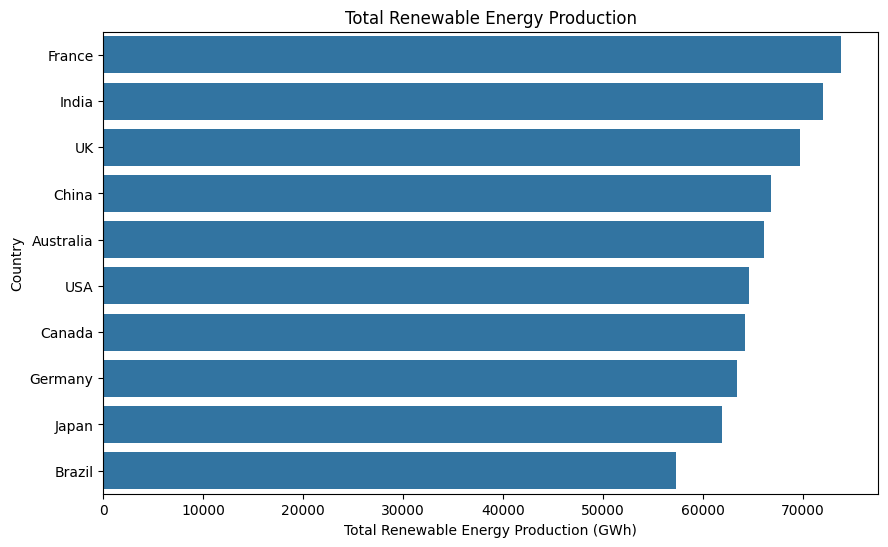

In [9]:
# Plotting the total production data

plt.figure(figsize=(10, 6))
sns.barplot(x=total_production.values, y=total_production.index)
plt.title('Total Renewable Energy Production')
plt.xlabel('Total Renewable Energy Production (GWh)')
plt.ylabel('Country')
plt.show()

In [13]:
# Renewable energy production trends for the top 5 countries over the last decade

# Define DataFrame to solve df not defined error
#df = renewable_df

# Get the top 5 countries by total renewable energy production
top_5_countries = renewable_df.groupby('Country')['TotalRenewableEnergy'].sum().nlargest(5).index

# Create a new DataFrame with only the top 5 countries
df_top_5 = renewable_df[renewable_df['Country'].isin(top_5_countries)]

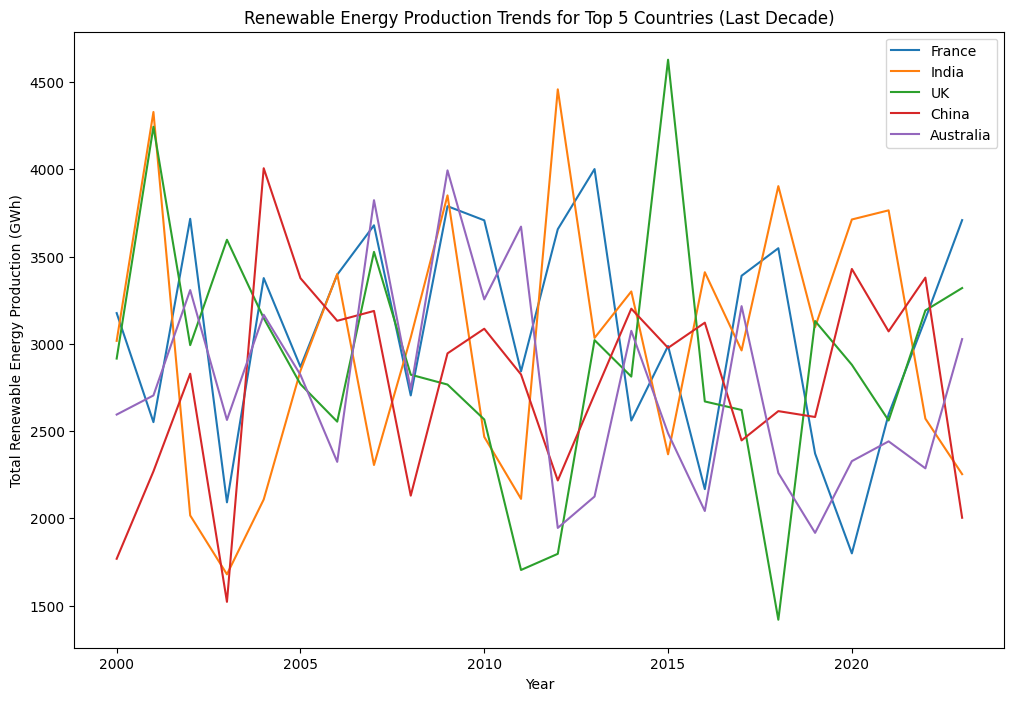

In [14]:
# plot trends over last 2 decades, add trendlines

plt.figure(figsize=(12, 8))
for country in top_5_countries:
    country_data = df_top_5[df_top_5['Country'] == country]
    plt.plot(country_data['Year'], country_data['TotalRenewableEnergy'], label=country)
plt.title('Renewable Energy Production Trends for Top 5 Countries (Last Decade)')
plt.xlabel('Year')
plt.ylabel('Total Renewable Energy Production (GWh)')
plt.legend()
plt.show()

In [11]:
# 3. Comparison of renewable energy production between developed and developing countries

developed_countries = ['USA', 'Germany', 'UK', 'France', 'Japan', 'Australia', 'Canada']  # developed countries
developing_countries = ['India', 'China', 'Brazil']  # assume they are developing countries

In [20]:
# new column created to categorize countries, lambda function categorizes each country in the dataset into 'Developed', 'Developing', or 'Other'.
df['Economic_Group'] = df['Country'].apply(lambda x: 'Developed' if x in developed_countries else ('Developing' if x in developing_countries else 'Other'))
# grouping and summing renewable energy production by economic group
group_comparison = df.groupby('Economic_Group')['TotalRenewableEnergy'].sum()
group_comparison

Economic_Group
Developed     463711.340203
Developing    196136.655026
Name: TotalRenewableEnergy, dtype: float64

In [13]:
df.columns

Index(['Year', 'Country', 'SolarEnergy', 'WindEnergy', 'HydroEnergy',
       'OtherRenewableEnergy', 'TotalRenewableEnergy', 'Economic_Group'],
      dtype='object')

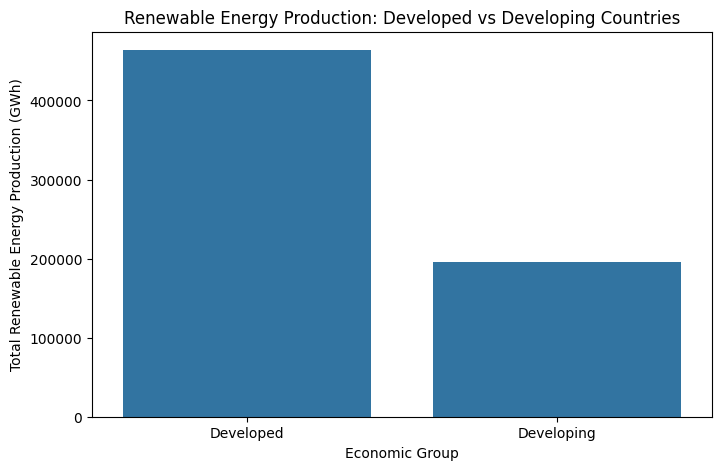

In [14]:
# plotting the comparison

plt.figure(figsize=(8, 5))
sns.barplot(x=group_comparison.index, y=group_comparison.values)
plt.title('Renewable Energy Production: Developed vs Developing Countries')
plt.xlabel('Economic Group')
plt.ylabel('Total Renewable Energy Production (GWh)')
plt.show()

In [15]:
# 4. Annual growth rates of renewable energy production for the  10 countries
# .pct_change() function calculates the percentage change between the current and a prior element
# .dropna() function to remove any NaN values that may result from the percentage change calculation, since the first year in the dataset for each country will have a NaN growth rate because there is no previous year to compare it to.
growth_rates = df.groupby(['Country', 'Year'])['TotalRenewableEnergy'].sum().pct_change().dropna()
growth_rates

Country    Year
Australia  2001    0.042241
           2002    0.223276
           2003   -0.224956
           2004    0.235149
           2005   -0.108887
           2006   -0.176606
           2007    0.645414
           2008   -0.283934
           2009    0.458990
           2010   -0.185108
           2011    0.128089
           2012   -0.470316
           2013    0.092519
           2014    0.446964
           2015   -0.191038
           2016   -0.179024
           2017    0.575065
           2018   -0.297409
           2019   -0.151815
           2020    0.214450
           2021    0.048741
           2022   -0.063317
           2023    0.323952
Brazil     2000   -0.028846
           2001    0.130255
           2002   -0.482578
           2003   -0.135003
           2004    1.017923
           2005   -0.393478
           2006   -0.173099
           2007    0.244000
           2008    0.296367
           2009    0.327016
           2010   -0.139311
           2011   -0.301608
    

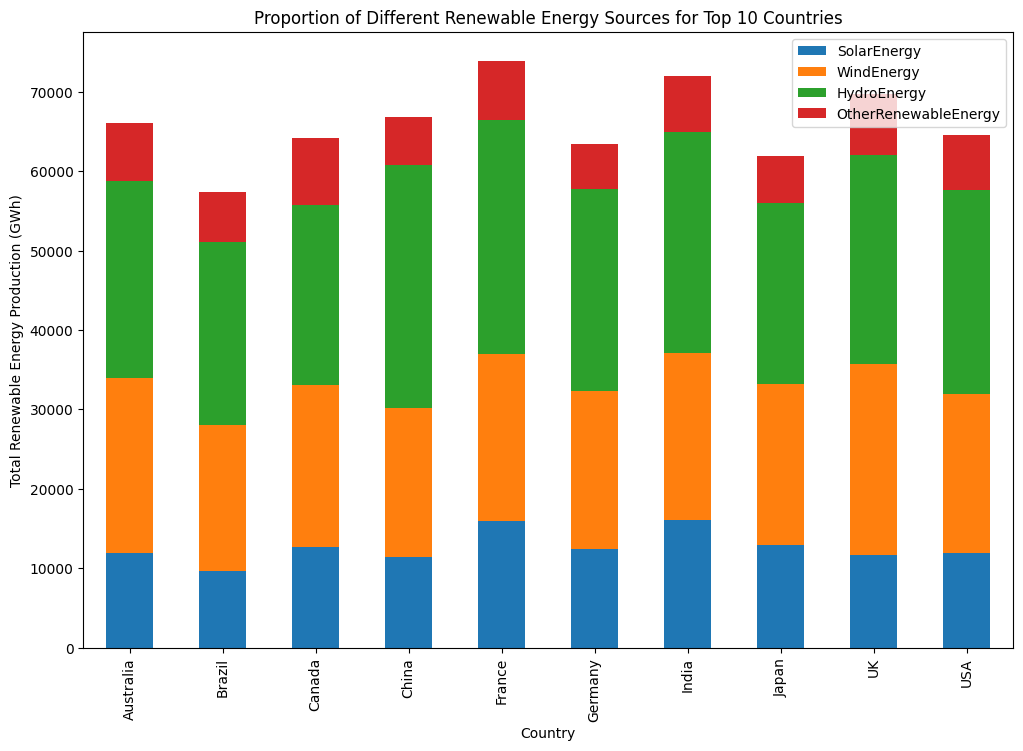

In [16]:
# 5. Proportion of different renewable energy sources for the top 10 countries

# columns for each type of renewable energy source: 'Solar', 'Wind', 'Hydro', 'other'.
# stacked=True parameter ensures that the different renewable energy sources are stacked on top of each other in the bars
# bar plot is created with the kind='bar' parameter.

proportions = df.groupby('Country')[['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy']].sum()
proportions.plot(kind='bar', stacked=True, figsize=(12, 8))

# plotting the proportions
plt.title('Proportion of Different Renewable Energy Sources for Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Total Renewable Energy Production (GWh)')
plt.show()

In [21]:
# 6. Correlation between renewable energy policy implementation and production growth
# create a column 'Policy_Implementation_Year' indicating the year a renewable energy policy was implemented
# Steps to Infer Policy Implementation Years from Spikes in Production
#1.Calculate the year-over-year percentage change in renewable energy production.
#2.Identify Significant Spikes,consider any year with a growth rate greater than a percentage 20% as indicative of policy implementation.
#Create the Policy Implementation Year Column whereby for each country, the first year with a significant spike as the policy implementation year.

# Calculate the year-over-year percentage change in renewable energy production
df['Pct_Change'] = df.groupby('Country')['TotalRenewableEnergy'].pct_change()

# Define a threshold for significant spikes (i.e 20% increase)
threshold = 0.2

# Identify the first year with a significant spike for each country

def identify_policy_year(group, threshold):
    significant_years = group[group['Pct_Change'] > threshold]['Year']
    if not significant_years.empty:
        return significant_years.iloc[0]
    return np.nan

policy_years = df.groupby('Country').apply(identify_policy_year, threshold=threshold).reset_index()
policy_years.columns = ['Country', 'Policy_Implementation_Year']

# Merge the policy implementation years back into the original dataframe
df = df.merge(policy_years, on='Country', how='left')
df

,Year,Country,SolarEnergy,WindEnergy,HydroEnergy,OtherRenewableEnergy,TotalRenewableEnergy,Economic_Group,Pct_Change,Policy_Implementation_Year_x,Policy_Implementation_Year_y
0,2000,USA,437.086107,1435.928598,1544.389701,319.396318,3736.800724,Developed,NaN,2002,2002
1,2001,USA,240.416776,402.792876,398.742141,439.779266,1481.731059,Developed,-0.603476,2002,2002
2,2002,USA,641.003511,1120.494351,334.993640,486.459433,2582.950935,Developed,0.743198,2002,2002
3,2003,USA,849.198377,476.040844,609.102444,132.532029,2066.873694,Developed,-0.199801,2002,2002
4,2004,USA,373.818019,882.183361,1034.306532,181.053113,2471.361025,Developed,0.195700,2002,2002
5,2005,USA,650.667605,381.342019,796.645903,214.862829,2043.518356,Developed,-0.173120,2002,2002
6,2006,USA,510.462986,1220.728750,639.445430,281.405497,2652.042663,Developed,0.297783,2002,2002
7,2007,USA,633.173112,260.385537,1332.826248,126.735856,2353.120752,Developed,-0.112714,2002,2002
8,2008,USA,158.546434,1433.551198,1941.574456,413.778807,3947.450895,Developed,0.677539,2002,2002
9,2009,USA,374.152392,326.973748,1463.196145,248.068622,2412.390908,Developed,-0.388874,2002,2002


NameError: name 'np' is not defined

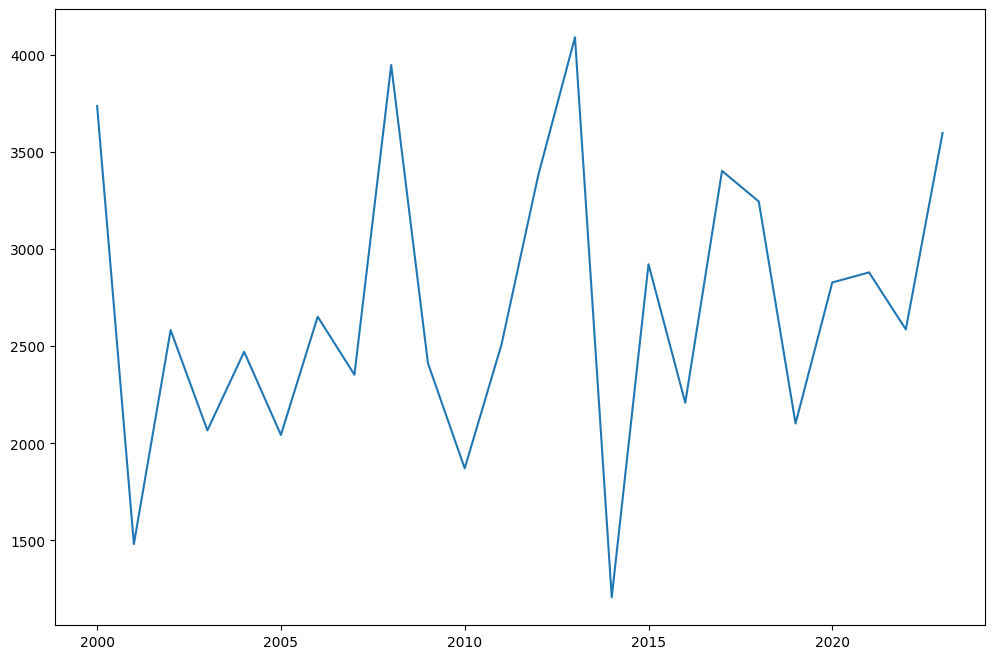

In [18]:
# visualization of renewable energy production along with the inferred policy implementation years to provide better insights.
plt.figure(figsize=(12, 8))
for country in df['Country'].unique():
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Year'], country_data['TotalRenewableEnergy'], label=country)
    
    # Check if the 'Policy_Implementation_Year' column exists

    if 'Policy_Implementation_Year' in country_data.columns:
        policy_year = country_data['Policy_Implementation_Year'].iloc[0]
        if not np.isnan(policy_year):
            plt.axvline(x=policy_year, color='r', linestyle='--', label=f'{country} Policy Year')

plt.title('Renewable Energy Production and Policy Implementation Years')
plt.xlabel('Year')
plt.ylabel('Total Renewable Energy Production (GWh)')
plt.legend()
plt.show()